# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Step 1: Reading and Understanding the data


In [1]:
#importing numpy, pandas

import numpy as np
import pandas as pd

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the day.csv file.
# assiging it to a dataframe bike.
#checking head i.e quick glance at dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# shape of the dataframe
bike.shape

(730, 16)

In [4]:
# bike information i.e information related to datasets columns.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Inspecting numerical statistics for dataset using describe method.
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# percentage of missing values in each row
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [8]:
# Checking for duplicate values
check_bike_duplicate = bike.copy()
check_bike_duplicate.drop_duplicates(subset=None, inplace=True)
check_bike_duplicate.shape

(730, 16)

In [9]:
bike.shape

(730, 16)

# Infrences
There seems to be no missing values from non-null value count on both rows and columns.

There seems to be no duplicate row.

# Data Cleaning 
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant is just a record index, this column can be removed.

dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday columnas it not bringing any new information.

addition of casual and registered columns gives cnt column, and we will not going to get much information from these columns, thus we wil drop these two as well

To preserve the original dataset, we will save orininal dataset in bike_original and continue working on bike dataset.

In [10]:
bike_original= bike

In [11]:
bike_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
bike= bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Step 2: Visualising the Data | EDA

### Objective
- We want to check if all the variables are linearly related or not so that we can determine if if we want to proceed with a linear model or not.
- Checking for multicollinearity
- To identify if some predictors directly have a strong association(correlation) with the outcome variable

We will use `matplotlib` and `seaborn` to visualize our data.

In [14]:
#import libraries for visualization purpose

import matplotlib.pyplot as plt
import seaborn as sns

### Visualize numerical data


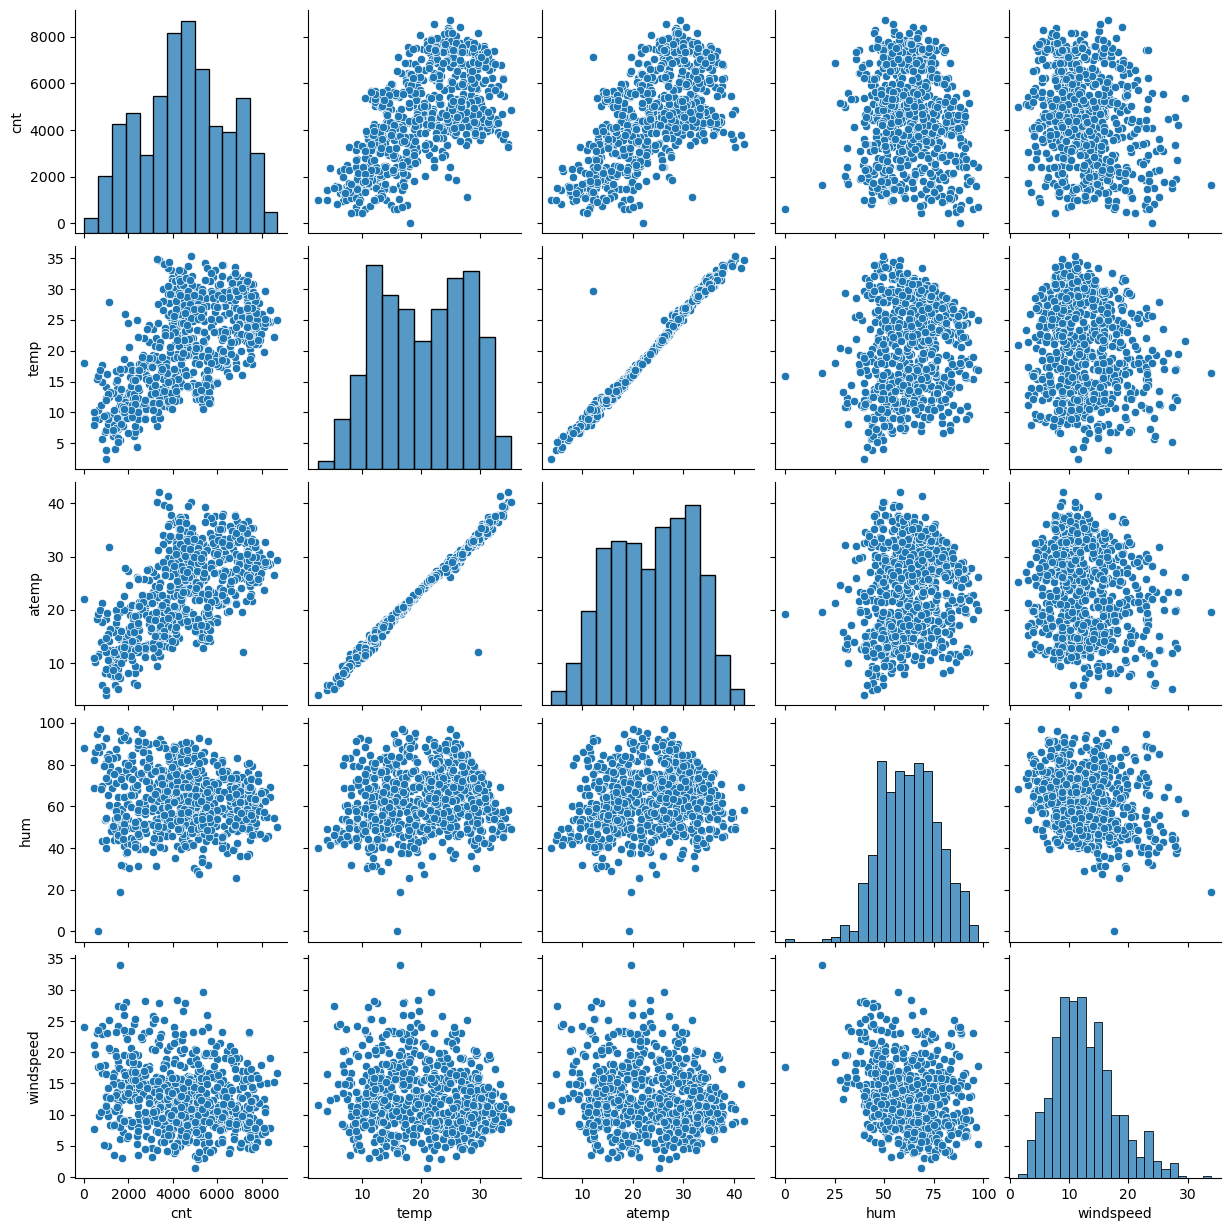

In [15]:
#Using a pairplot
sns.pairplot(data = bike, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Feedback
There is some linear relation between temp, atemp with Count.This shows that we can do linear regression for solving the problem.

### Visualising Categorical Variables

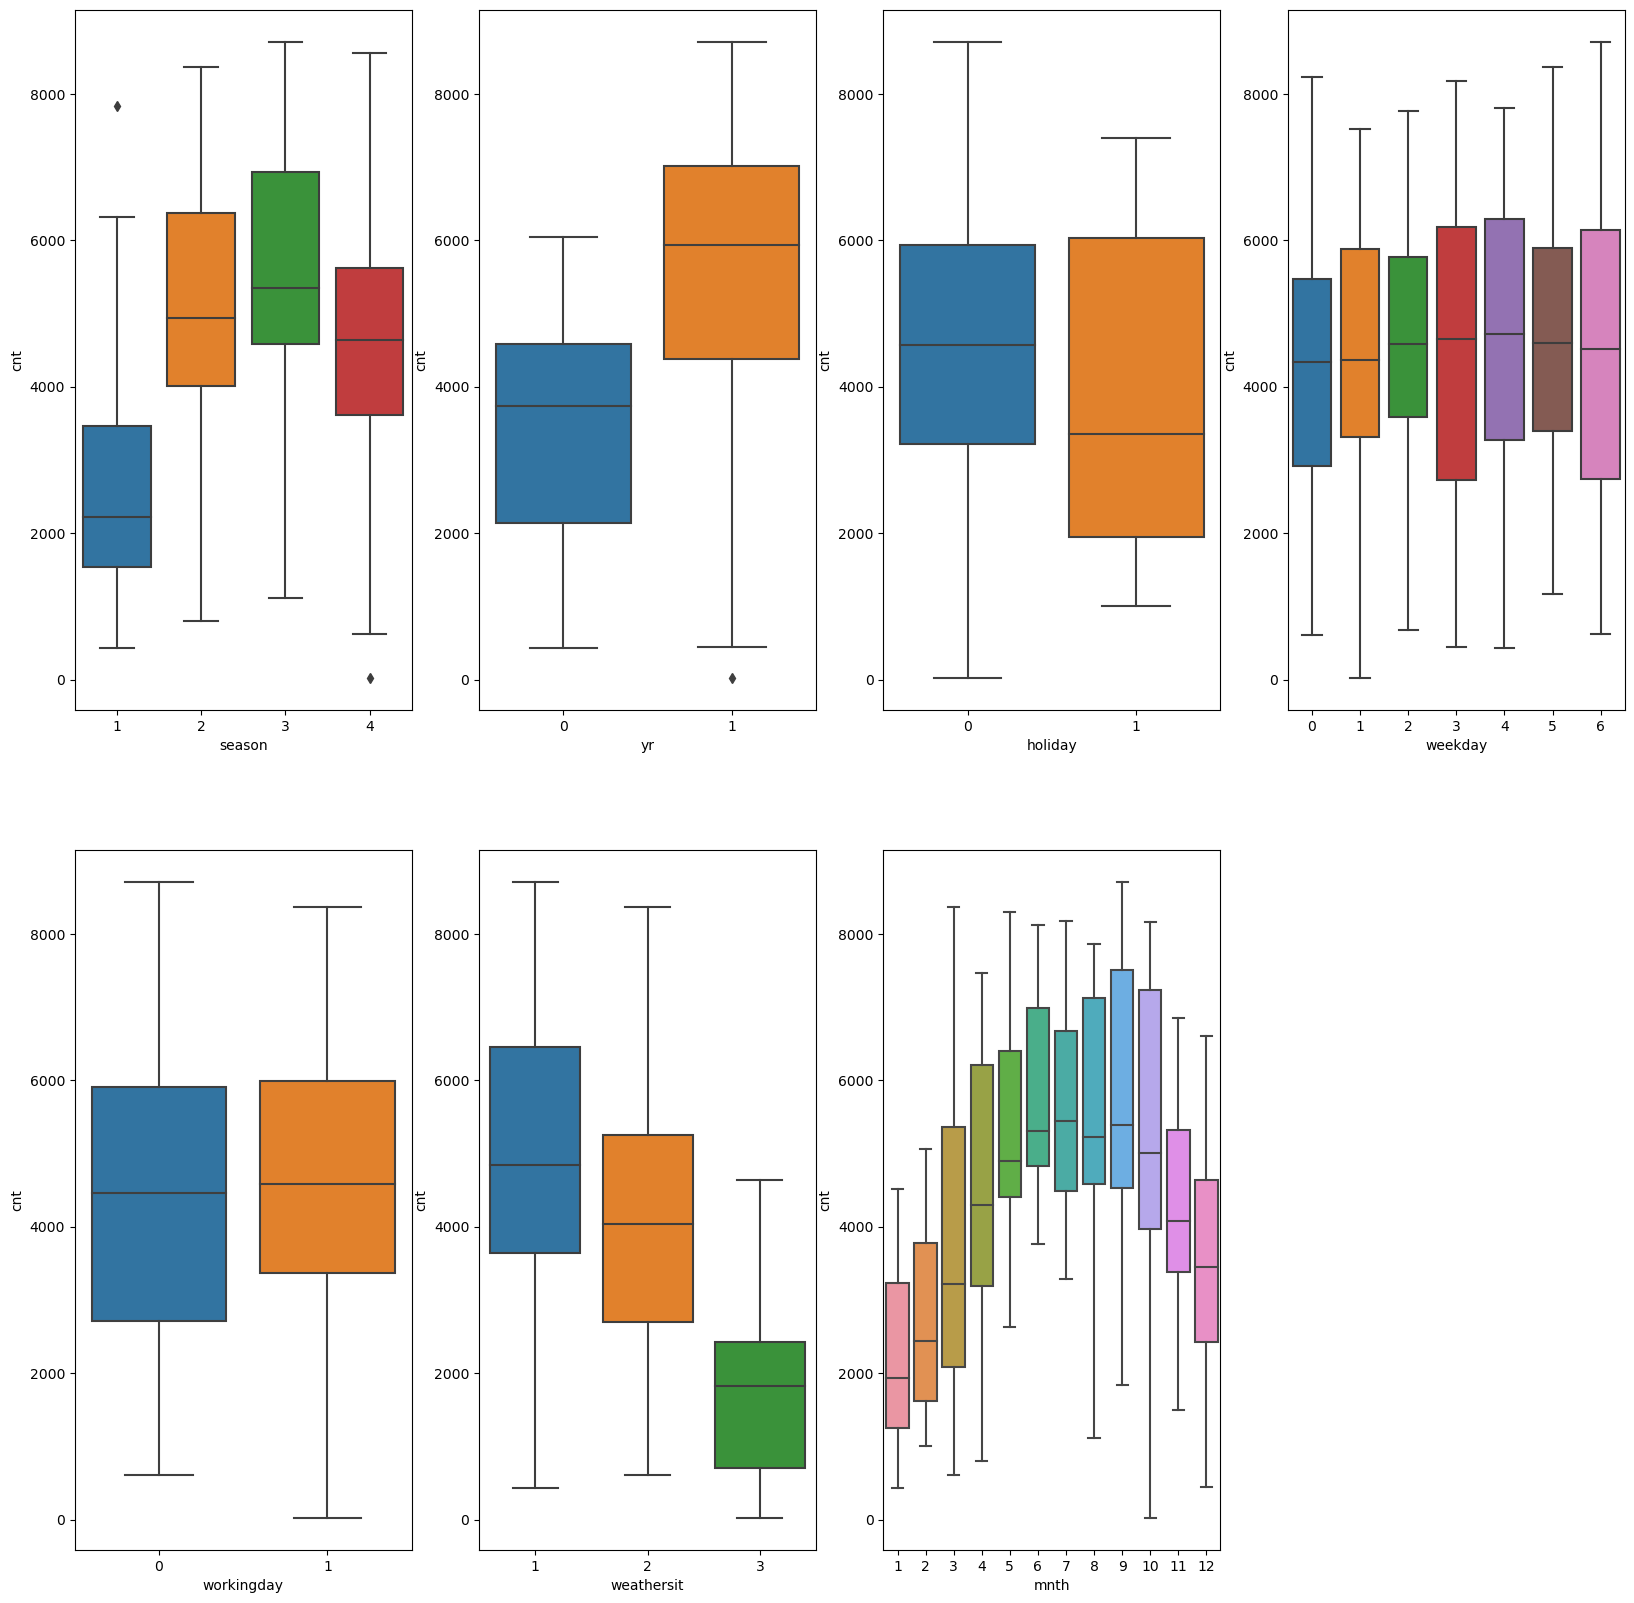

In [16]:
#Using a Boxplot
plt.figure(figsize=(20, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

### Feedback
- The variable season, category 3 : Fall, has the high demand was during this season. It is least for 1: spring.
- The variable year, 2019 had a higher count of users as compared to 2018
- The variable holiday,count of users is less during the holidays
- The variable weekday, bike demand is almost constant throughout the week.
- The variable workingday, it does matter working day or not. Count seems to be same.
- The variable weathersit, total users is in between 4000 to 6000 during clear weather and least when 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- The count is highest in the month of August, september and october


# Step 3: Data Preparation

### By referencing data dictionary mapping the categorical values

In [17]:
#Mapping months
import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [18]:
#Mapping seasons
bike.season = bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [19]:
#Mapping weathersit
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [20]:
#Mapping Weekday
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [21]:
#View the updated dataframe now
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables
Now creating DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit` as they have values which can be categorized.

In [22]:
#Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike[['season','mnth','weekday','weathersit']]
dummy.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Saturday,Mist & Cloudy
1,Spring,Jan,Sunday,Mist & Cloudy
2,Spring,Jan,Monday,Clear
3,Spring,Jan,Tuesday,Clear
4,Spring,Jan,Wednesday,Clear


In [23]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [24]:
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
#Concatinating dummy dataset to original dataset bike
bike = pd.concat([dummy,bike],axis = 1)

In [26]:
#checking updated dataframe
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
#Deleting the orginal columns season.weathersit,weekday,mnth as they are logically duplicating the data
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)
bike.drop(['weekday'],axis=1,inplace=True)
bike.drop(['mnth'],axis=1,inplace=True)
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
bike.shape

(730, 30)

In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    bool   
 1   season_Summer                 730 non-null    bool   
 2   season_Winter                 730 non-null    bool   
 3   mnth_Aug                      730 non-null    bool   
 4   mnth_Dec                      730 non-null    bool   
 5   mnth_Feb                      730 non-null    bool   
 6   mnth_Jan                      730 non-null    bool   
 7   mnth_Jul                      730 non-null    bool   
 8   mnth_Jun                      730 non-null    bool   
 9   mnth_Mar                      730 non-null    bool   
 10  mnth_May                      730 non-null    bool   
 11  mnth_Nov                      730 non-null    bool   
 12  mnth_Oct                      730 non-null    bool   
 13  mnth_

# Step 4: Splitting the Data into Training and Testing Sets

In [30]:
#Performing a train-test split.Dividing in 70% & 30%.
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
#verify the columns and rows
print(train.shape)
print(test.shape)

(510, 30)
(219, 30)


# Step 5 :Rescaling the Features

In [32]:
#Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns with numerical values
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [34]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,False,False,True,False,False,False,False,False,False,False,...,False,False,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,False,False,False,False,False,False,False,True,False,False,...,False,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,False,False,False,False,False,True,...,False,True,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,True,False,False,False,False,False,...,False,False,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [35]:
train[num_vars].head()

,cnt,hum,windspeed,temp,atemp
653,0.864243,0.575354,0.300794,0.509887,0.501133
576,0.827658,0.725633,0.264686,0.815169,0.766351
426,0.465255,0.640189,0.255342,0.442393,0.438975
728,0.204096,0.498067,0.663106,0.245101,0.200348
482,0.482973,0.504508,0.188475,0.395666,0.391735


In [36]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the coefficients for highly correlated variables

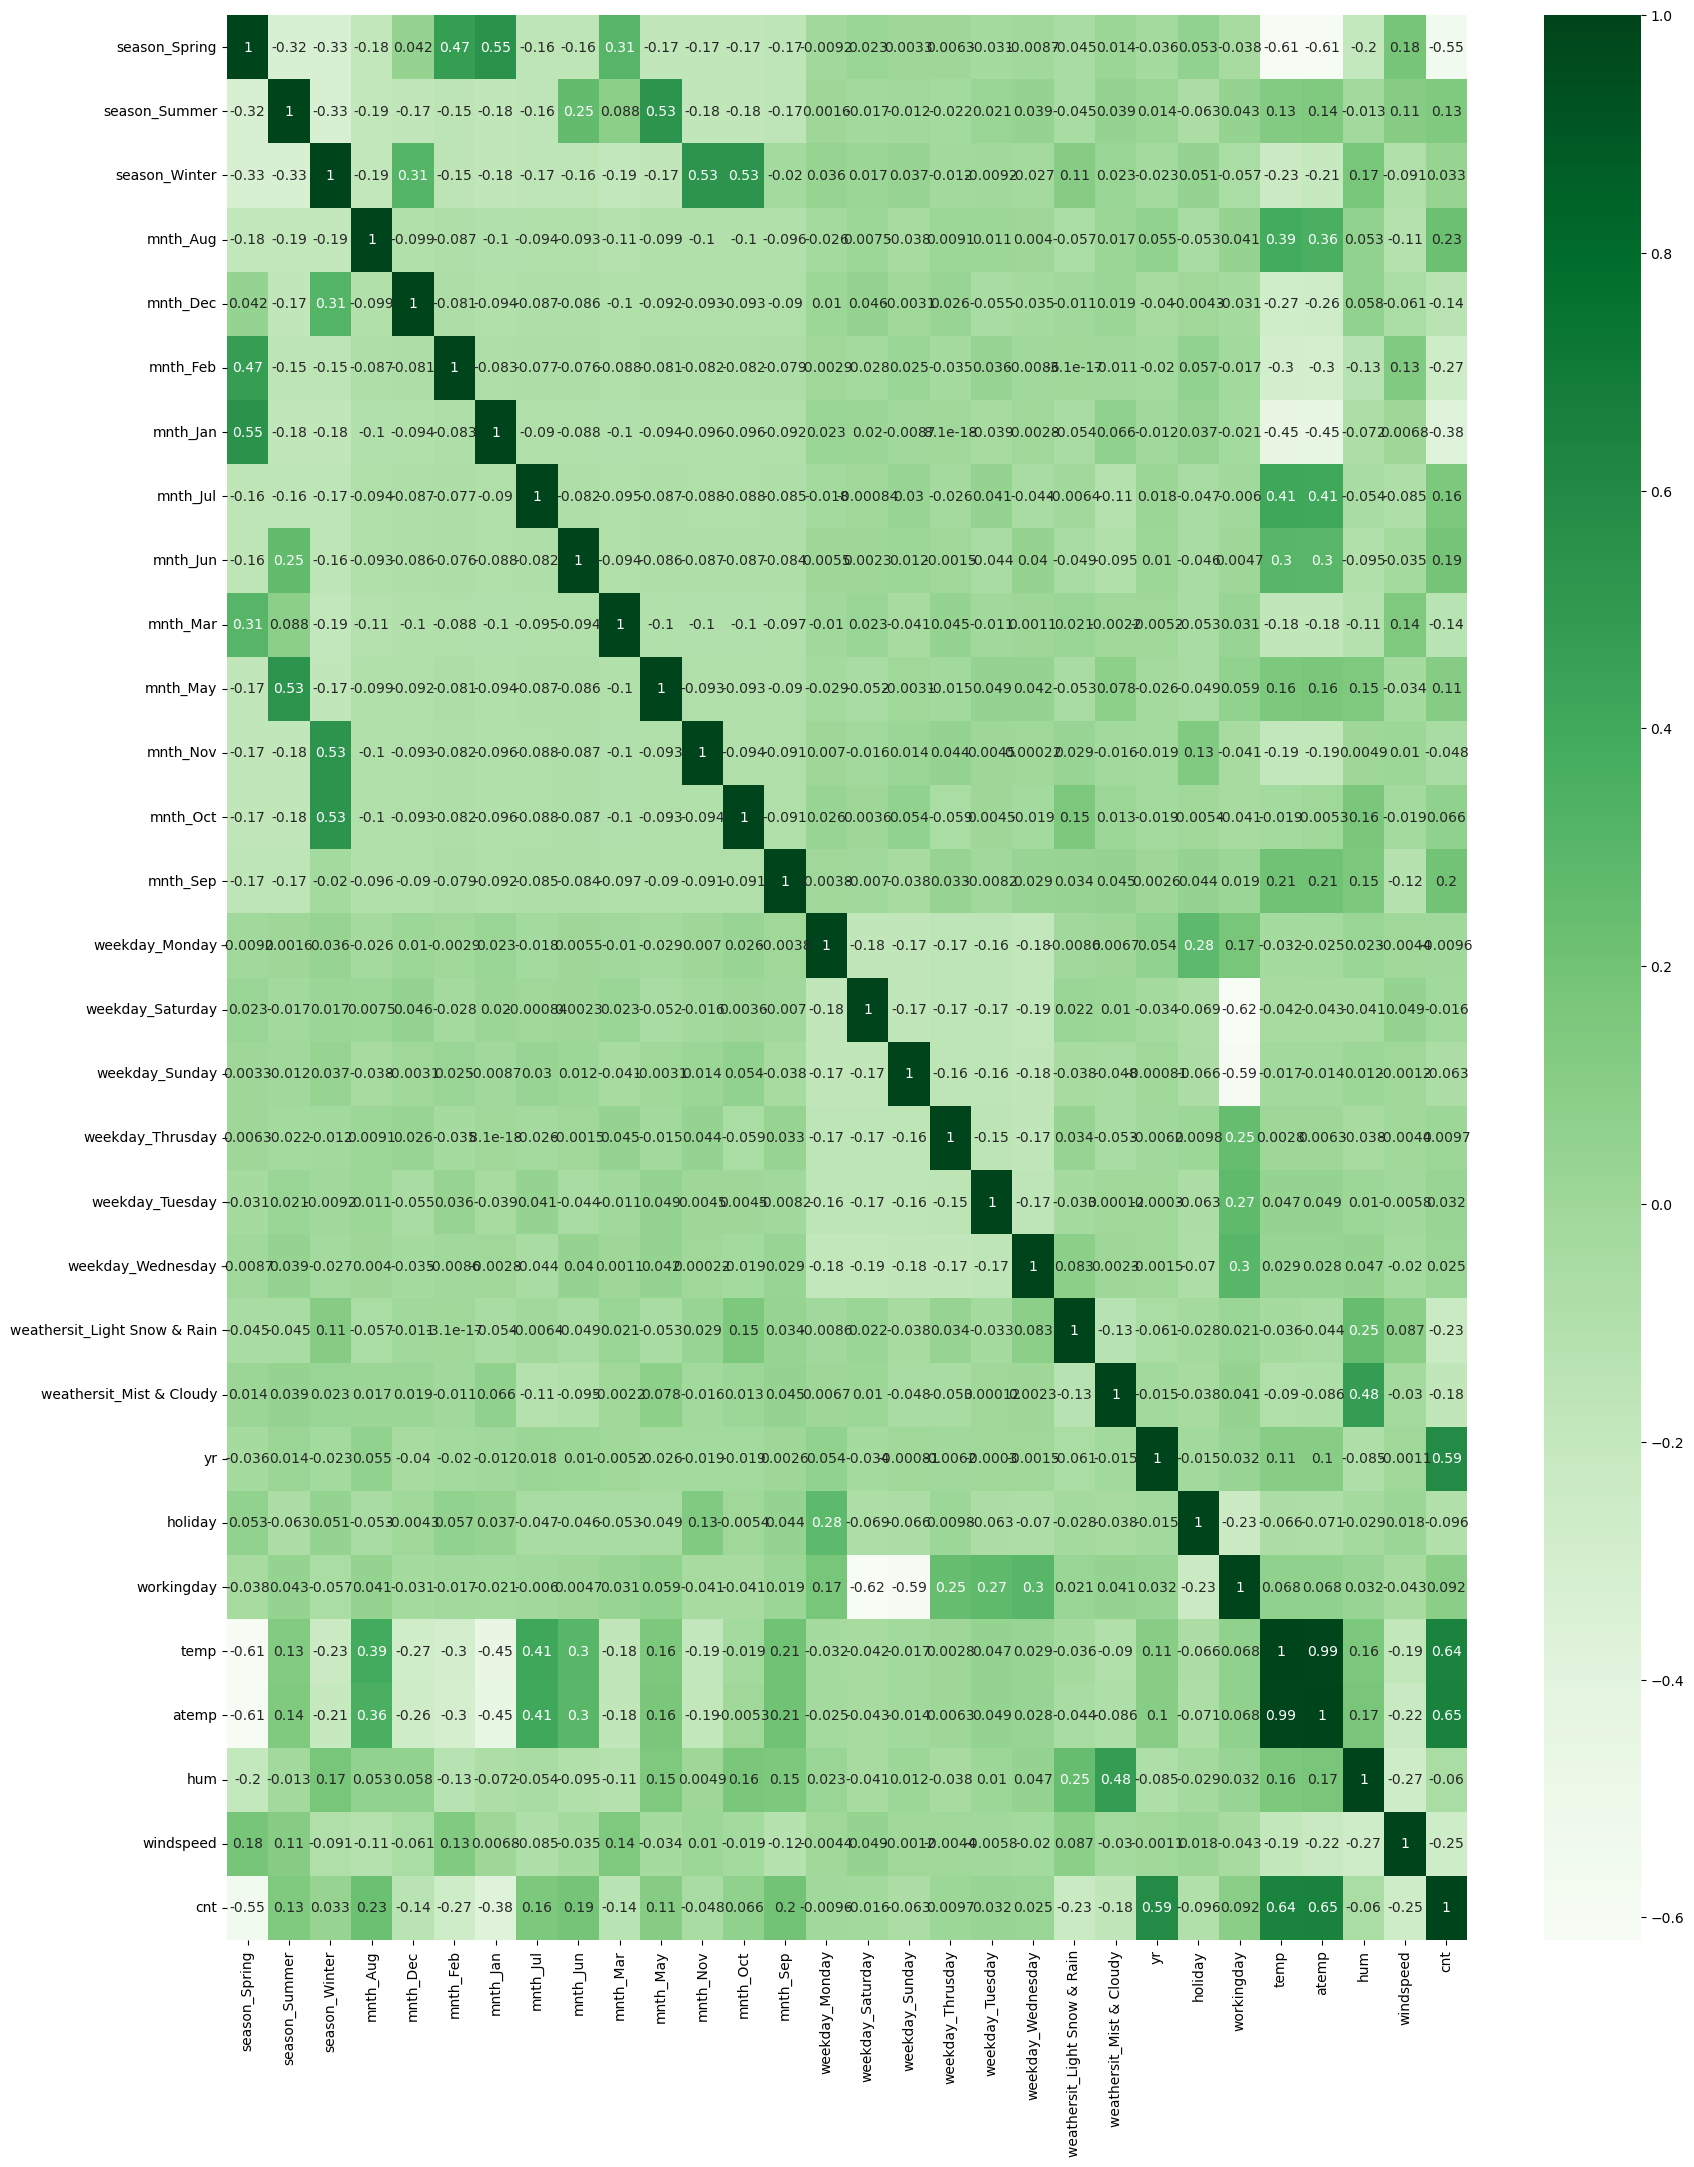

In [37]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="Greens")
plt.show()

### Feedback
`atemp` and `temp` seems to be correlated to the target variable `cnt`.Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

### Dividing into X and Y sets for the model building

In [38]:
y_train = train.pop('cnt')
X_train = train

In [39]:
y_train.shape

(510,)

# Step 6: Building a linear model

In [40]:
#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### For Feature Selection We start with 15 variables.

We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [41]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [42]:
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 2),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Adding a constant variable 

In [47]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,False,False,True,False,False,False,False,False,False,1,0,1,0.509887,0.575354,0.300794
576,1.0,False,False,False,False,True,False,False,False,False,1,0,1,0.815169,0.725633,0.264686
426,1.0,True,False,False,False,False,False,True,False,True,1,0,0,0.442393,0.640189,0.255342
728,1.0,True,False,False,False,False,False,False,False,False,1,0,0,0.245101,0.498067,0.663106
482,1.0,False,True,False,False,False,False,True,False,True,1,0,0,0.395666,0.504508,0.188475


### Running the linear model

In [48]:
#Create a first fitted model
#using the .astype method to convert to float when running the model.
lr1 = sm.OLS(y_train, X_train_rfe.astype(float)).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.31e-191
Time:                        23:45:53   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2510      0.036      6.949      0.000       0.180       0.322
season_Spring                   -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_Summer                    0.0497      0.015      3.346      0.001       0.020       0.079
season_Winter                    0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                        -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                        -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                         0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Saturday                 0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist & Cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
yr                               0.2305      0.008     28.807      0.000       0.215       0.246
holiday                         -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                       0.0435      0.012      3.781      0.000       0.021       0.066
temp                             0.5098      0.034     14.851      0.000       0.442       0.577
hum                             -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                       -0.1860      0.025     -7.301      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Feedback
p-value for all the variables is < 0.05 so we can proceed without dropping any coulumns. We can proceed with model

## Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_Spring,5.08
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.64
14,hum,1.92
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


In [50]:
# dropping `const` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.48
1,season_Summer,2.84
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In [52]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [53]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


In [95]:
# dropping `temp` column as the vif is > 5
#X_train_rfe = X_train_rfe.drop(['temp'], axis=1)

In [54]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


### All VIF is now around 5 only temp is slightly over 5. But we will not drop it and move ahead.

### Preparing the final model

In [55]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe.astype(float))

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [57]:
# Check the summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          7.33e-189
Time:                        23:48:04   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [59]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


### Feedback

Here we see that except for temp with vif 7(choose to ignore) rest all the columns have a vif value around 5.

`lm_2` seems more appropriate as final model.

# Step 7: Residual Analysis of the train data

In [60]:
y_train_cnt = lm_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

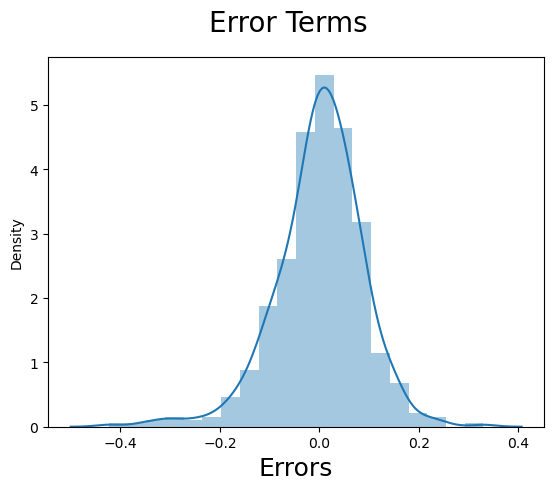

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

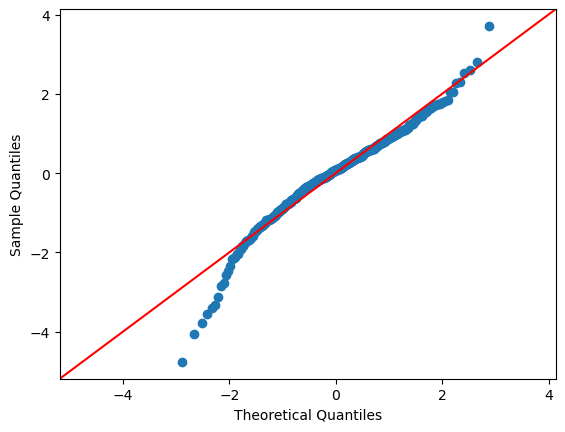

In [62]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

### Feedback
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.
- From QQ plots, the data points lie on the straight line which means that the error terms are normally distributed.


# Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [63]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [64]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [65]:
#Dividing into X and Y test
y_test = test.pop('cnt')
X_test = test

In [66]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#### Predicting using values used by the final model


In [67]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    bool   
 2   season_Summer                 219 non-null    bool   
 3   season_Winter                 219 non-null    bool   
 4   mnth_Jan                      219 non-null    bool   
 5   mnth_Jul                      219 non-null    bool   
 6   mnth_Sep                      219 non-null    bool   
 7   weekday_Saturday              219 non-null    bool   
 8   weathersit_Light Snow & Rain  219 non-null    bool   
 9   weathersit_Mist & Cloudy      219 non-null    bool   
 10  yr                            219 non-null    int64  
 11  holiday                       219 non-null    int64  
 12  workingday                    219 non-null    int64  
 13  temp     

In [68]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test)

#### Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8045478865351158

### Feedback

We can see that the `r_squared on the test set is 0.804` and the `r-squared on the trained set 0.843` which is almost equal. 

# Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

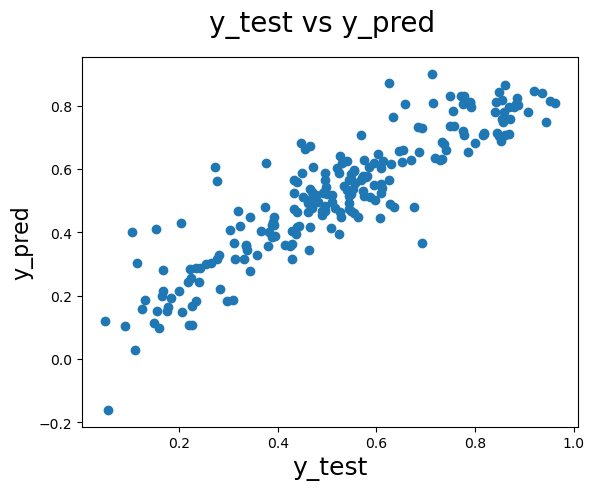

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Feedback
We can see there is linear relationship between y_test and y_test_pred

In [72]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.472823
10,yr,0.234361
0,const,0.173663
3,season_Winter,0.079699
6,mnth_Sep,0.075318
7,weekday_Saturday,0.058434
12,workingday,0.046502
2,season_Summer,0.043352
4,mnth_Jan,-0.038947


#### As per our final Model, the below predictor variables influences bike booking :

All positive Coefficient value will have positive influnce like temp, year-2019, Season_Winter, month_september and vice versa for -ve ones.


## Recommendations for the Company:
Boom Bikes keep close eye on weather forecast as 
- with increase with temp demand increase.
- windspeed, snow/rain and cloudy decrease demand.

Seasonwise, Summer and winter will see high demands. 

Monthwise september seems to be high demand month while Jan and July seems to be low. So they can work on the staffing or other menthods to meet demand and supply.

